In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyvis.network import Network

In [6]:
df_player = pd.read_csv('full_player_data.csv',index_col=[0])
df_player.drop_duplicates(inplace=True)

Agrupar todos os jogadores por nacionalidade e retornar as 10 primeiras nacionalidades aonde existem mais de 22 jogadores(um time completo)

In [7]:
df_top_10 = df_player.groupby('nacionalidade')['geral'].count().reset_index().query('geral > 22').sort_values(by='geral',ascending=False).head(10)

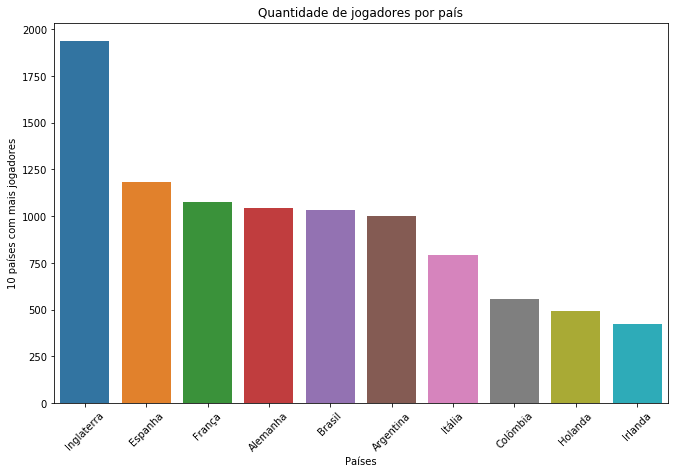

In [8]:
plt.figure(figsize=(11, 7))
g = sns.barplot(x=df_top_10['nacionalidade'],y=df_top_10['geral'])
g.set(xlabel='Países', ylabel='10 países com mais jogadores')
g.set_title('Quantidade de jogadores por país')
plt.setp(g.get_xticklabels(), rotation=45);

10 países aonde tem os jogadores mais fortes

In [9]:
df_top10_overall = df_player[df_player.geral > df_player.geral.quantile(0.9)].query('geral > 22').groupby('nacionalidade')['geral'].count().sort_values(ascending=False).reset_index().head(10)

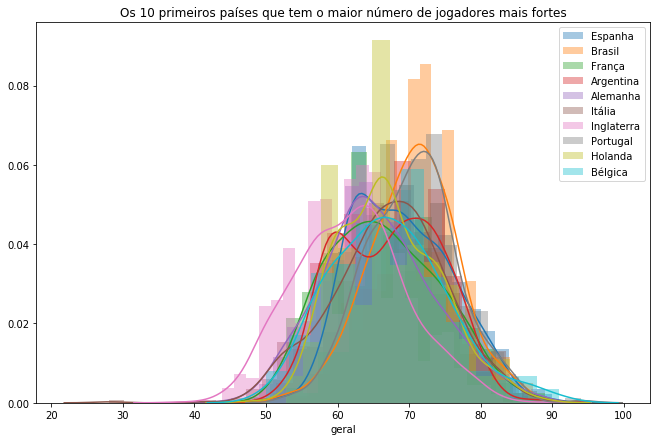

In [10]:
plt.figure(figsize=(11, 7))
for country in df_top10_overall.nacionalidade:
    sns.distplot(df_player.query(f'nacionalidade == "{country}"').geral)
plt.title('Os 10 primeiros países que tem o maior número de jogadores mais fortes')
plt.legend(labels=df_top10_overall.nacionalidade);

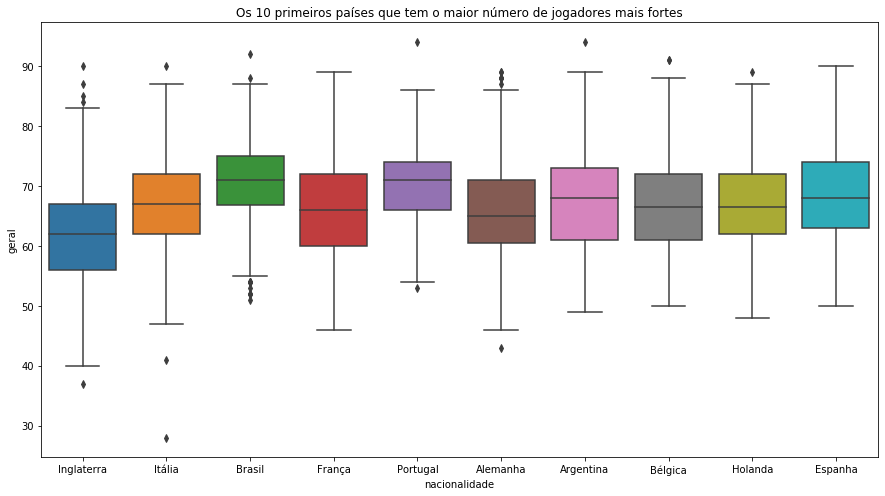

In [11]:
df_player10 = df_player[df_player.nacionalidade.isin(df_top10_overall.nacionalidade)]
plt.figure(figsize=(15,8))
plt.title('Os 10 primeiros países que tem o maior número de jogadores mais fortes')
sns.boxplot(x=df_player10.nacionalidade,y=df_player10.geral);

In [12]:
df_top10_player = df_player[df_player.geral >= df_player.geral.mean()].sort_values(by='geral', ascending=False).head(10).reset_index()
lst_dad = list(df_top10_player[df_top10_player.geral == df_top10_player.geral.max()].index)
overall_dad = df_top10_player.geral.max()

In [13]:
g = Network(notebook=True, height=800, width=800, directed=True,layout=True)
i = 0
edge = 0
for index, item in df_top10_player.iterrows():
    g.add_node(i, shape='image', image =item.foto, label=item.nome, size=40, color = "blue")    
    if item.geral != overall_dad:
        for dad in lst_dad:
            g.add_edge(index,dad)
    i+=1    
g.show('player_graph.html')